# ATP Tennis Data - Player Diff Stats



# Summary of Results






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, LABEL_COL
import util.model_util as mu
import logging
import importlib

logging.basicConfig(level=logging.INFO)
%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d %H:%m'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "raw-ohe"


# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    DESCRIPTION = f"{DESCRIPTION}-test"
    FEATURE_FILE = '../datasets/atp_matches_1985-2019_features_test-raw_diff-ohe-history-matchup-stats.csv'
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
else:
    FEATURE_FILE = '../datasets/atp_matches_1985-2019_features-raw_diff-ohe-history-matchup-stats.csv'




START_YEAR = 1998
END_YEAR = 2018


column_filters = ["util.model_util.BaseRawFilter", "util.model_util.OHEFilter"]

In [2]:
X_train, X_test, y_train, y_test = ModelWrapper.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR, column_filters = column_filters)
print(f'Final columns: {X_test.columns}')

INFO:util.model_util:loading ../datasets/atp_matches_1985-2019_features-raw_diff-ohe-history-matchup-stats.csv
INFO:util.model_util:Shape before filtering: (59239, 5459)
INFO:util.model_util:Adding filter: util.model_util.BaseRawFilter
INFO:util.model_util:Adding filter: util.model_util.OHEFilter
INFO:util.model_util:Shape after filtering: (59239, 5257)
INFO:util.model_util:Final Features shape: (59239, 5257)


Final columns: Index(['draw_size', 'round_label', 'tourney_level_label', 'tourney_month',
       'tourney_year', 'p1_age', 'p1_ht', 'p1_rank', 'p1_seed', 'p2_age',
       ...
       'p2_200624', 'p2_200630', 'p2_202090', 'p2_202130', 'p2_202358',
       'p2_202359', 'p2_202385', 'p2_205734', 'best_of_3', 'best_of_5'],
      dtype='object', length=5257)


# Get our baseline

If we really don't know anything about tennis, then a reasonable way of predicting wins/losses would be by player rank. If we look at our dataset, the accuracy of using this method for prediction would be the baseline accuracy for our model:

If player 1 rank < player 2 rank, then label == 1 (win)
If player 2 rank < player 1 rank, then label == 0 (loss)
Sum these two numbers and divide by total samples would give us the baseline accuracy


In [3]:
tests = pd.concat([X_test, y_test], axis=1)
p1_wins = tests[(tests.p1_rank < tests.p2_rank) & (tests.p1_winner == 1)]
p2_losses = tests[(tests.p2_rank < tests.p1_rank) & (tests.p1_winner == 0)]
baseline_accuracy = (len(p1_wins) + len(p2_losses))/ len(tests)
print(f'Our baseline accuracy should be: {baseline_accuracy}')

Our baseline accuracy should be: 0.6565833896016205


# Run all Models

In [4]:
models = [
    LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
    KNeighborsClassifier(n_jobs = N_JOBS),
    DecisionTreeClassifier(random_state = RSTATE),
    RandomForestClassifier(random_state=RSTATE, verbose=1),
    GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
    AdaBoostClassifier(random_state=RSTATE),
]



Running LogisticRegression


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]Model Score: 0.6615800135043889

ROC/AUC Score: 0.661578647004313
              precision    recall  f1-score   support

        Loss       0.66      0.66      0.66      7381
         Win       0.66      0.66      0.66      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4880  2501
Win   2511  4918


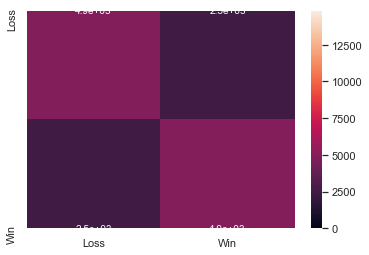

INFO:util.model_util:Saving model file: ../models/logisticregression-1998-2018-raw-ohe.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running KNeighborsClassifier
Model Score: 0.6106684672518569

ROC/AUC Score: 0.6106788212428513
              precision    recall  f1-score   support

        Loss       0.61      0.61      0.61      7381
         Win       0.61      0.61      0.61      7429

    accuracy                           0.61     14810
   macro avg       0.61      0.61      0.61     14810
weighted avg       0.61      0.61      0.61     14810

      Loss   Win
Loss  4531  2850
Win   2916  4513


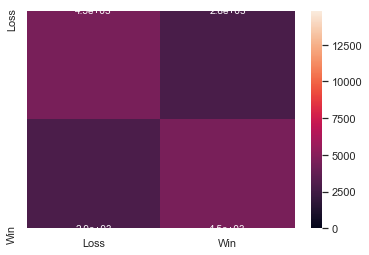

INFO:util.model_util:Saving model file: ../models/kneighborsclassifier-1998-2018-raw-ohe.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running DecisionTreeClassifier
Model Score: 0.6054692775151924

ROC/AUC Score: 0.6054605374175899
              precision    recall  f1-score   support

        Loss       0.60      0.60      0.60      7381
         Win       0.61      0.61      0.61      7429

    accuracy                           0.61     14810
   macro avg       0.61      0.61      0.61     14810
weighted avg       0.61      0.61      0.61     14810

      Loss   Win
Loss  4449  2932
Win   2911  4518


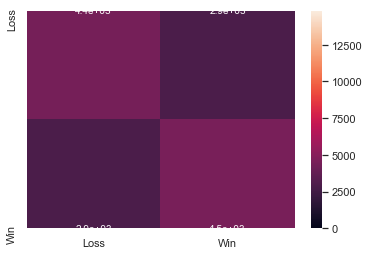

INFO:util.model_util:Saving model file: ../models/decisiontreeclassifier-1998-2018-raw-ohe.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running RandomForestClassifier


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.6442943956785956

ROC/AUC Score: 0.6444928714952801
              precision    recall  f1-score   support

        Loss       0.63      0.71      0.66      7381
         Win       0.67      0.58      0.62      7429

    accuracy                           0.64     14810
   macro avg       0.65      0.64      0.64     14810
weighted avg       0.65      0.64      0.64     14810

      Loss   Win
Loss  5209  2172
Win   3096  4333


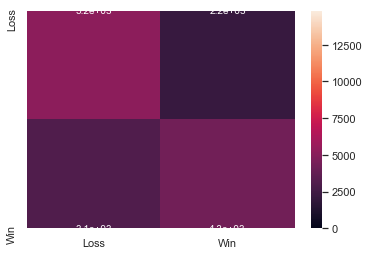

INFO:util.model_util:Saving model file: ../models/randomforestclassifier-1998-2018-raw-ohe.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running GradientBoostingClassifier
      Iter       Train Loss   Remaining Time 
         1           1.3670            9.20m
         2           1.3505            9.05m
         3           1.3357            8.89m
         4           1.3238            8.80m
         5           1.3131            8.69m
         6           1.3044            8.60m
         7           1.2958            8.49m
         8           1.2890            8.41m
         9           1.2825            8.31m
        10           1.2771            8.21m
        20           1.2394            7.58m
        30           1.2085            6.66m
        40           1.1864            5.68m
        50           1.1731            4.80m
        60           1.1666            3.79m
        70           1.1621            2.81m
        80           1.1591            1.87m
        90           1.1566           55.90s
       100           1.1545            0.00s
Model Score: 0.683322079

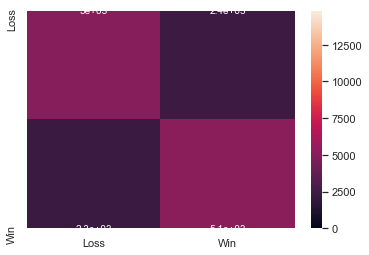

INFO:util.model_util:Saving model file: ../models/gradientboostingclassifier-1998-2018-raw-ohe.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running AdaBoostClassifier
Model Score: 0.6650911546252533

ROC/AUC Score: 0.6650486822377341
              precision    recall  f1-score   support

        Loss       0.67      0.65      0.66      7381
         Win       0.66      0.68      0.67      7429

    accuracy                           0.67     14810
   macro avg       0.67      0.67      0.67     14810
weighted avg       0.67      0.67      0.67     14810

      Loss   Win
Loss  4812  2569
Win   2391  5038


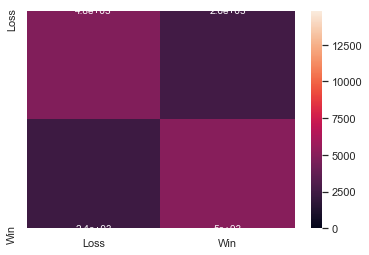

INFO:util.model_util:Saving model file: ../models/adaboostclassifier-1998-2018-raw-ohe.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


In [5]:
for model in models:
    print(f'\n\nRunning {type(model).__name__}')
    mw = mu.ModelWrapper(model,
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                    column_filters = column_filters)
    mw.fit(X_train, y_train)
    predict = mw.predict(X_test)
    mw.analyze(y_test)
    plt.show()
    mw.save()

# Summary

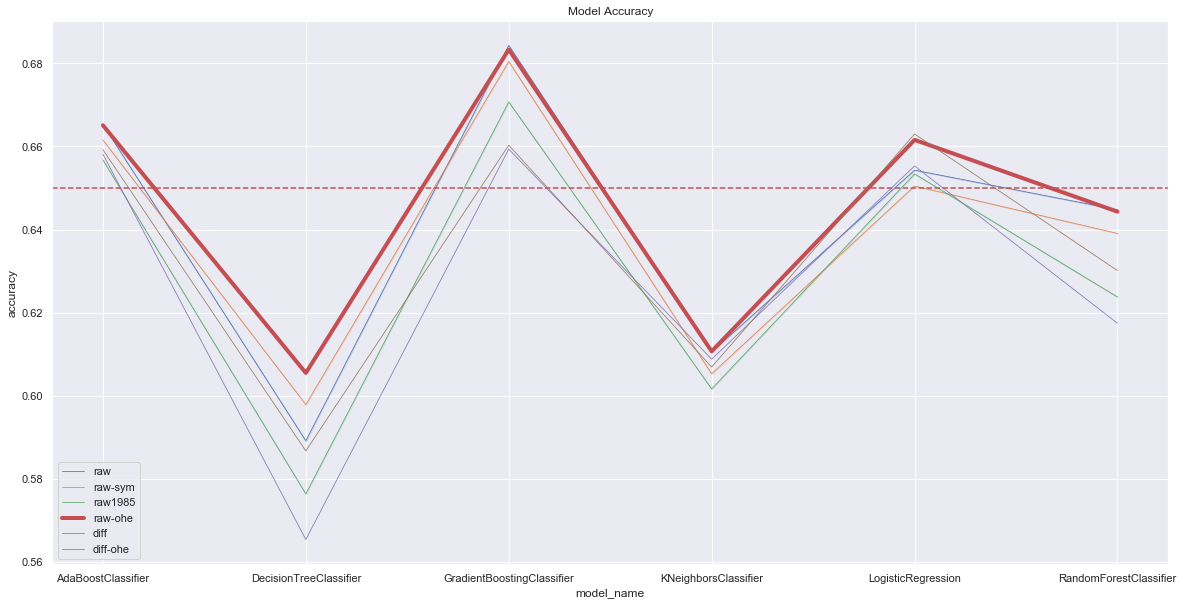

In [6]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)

f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

Best Model: GradientBoostingClassifier


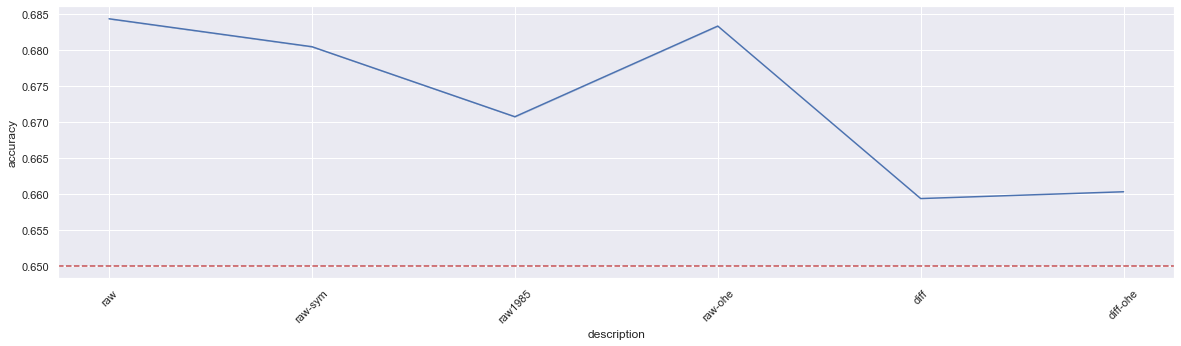

In [7]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')

dt_report = report[(report.model_name == 'GradientBoostingClassifier')]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.axhline(0.65, ls='--', color='r')
_ = a.set_label(f"{best_model} Accuracy")
_ = plt.xticks(rotation=45)


In [8]:
print(f'Last Finished: {datetime.now().strftime(DATE_FORMAT)}')

Last Finished: 2019-10-28 14:10
